In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('/Users/user/Desktop/ashish/dataframes/mobile_dataset.csv') 


In [2]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [3]:
X = df.iloc[: ,:-1] 
y =df.iloc[:,-1] 

In [4]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size = 0.3, random_state= 42)

X_train.shape,y_train.shape

((1400, 20), (1400,))

In [5]:
# univariate anaylisys : 

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 


In [6]:
best_ordered_rank_features = SelectKBest(
                                          score_func= chi2  , 
                                          k = len(X_train.columns))
best_ordered_rank_features.fit(X_train,y_train)
best_ordered_rank_features

SelectKBest(k=20, score_func=<function chi2 at 0x7fc1c9f43a60>)

In [7]:
f1_score = best_ordered_rank_features.scores_
p_val = best_ordered_rank_features.pvalues_ 

best_features = pd.DataFrame() 
best_features['f1_score' ] = f1_score 
best_features['p_val'] = p_val 
best_features['feature_name'] = X_train.columns
best_features.sort_values(by= 'f1_score',ascending= False , inplace= True)
best_features.head(2)

,f1_score,p_val,feature_name
13,649917.287197,0.0,ram
11,12782.800910,0.0,px_height


In [8]:
top_10  = best_features.nlargest(10,'f1_score') 

<Axes: xlabel='feature_name', ylabel='f1_score'>

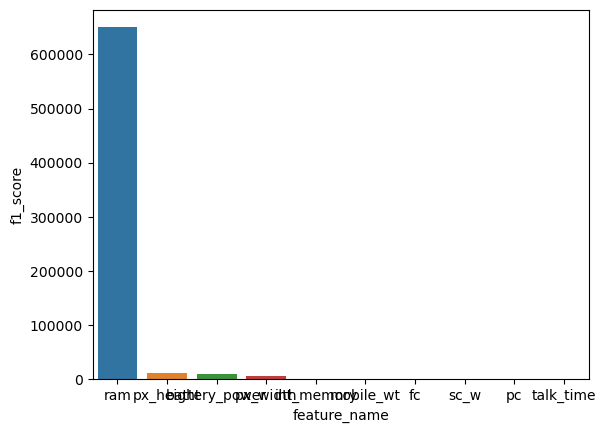

In [9]:
import seaborn as sns 
sns.barplot(x= 'feature_name',y ='f1_score', data = top_10 )

In [10]:
# feature importance : 

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
3

3

In [11]:
gini = model.feature_importances_

In [12]:
# how feature_importance_work : in Decisioin_Tree : 
# it is gini impurity  : which is known as feature_imporranc : 
 
# impurity baised feature importance can be miss leadig in high cardinality datasets : 
# then you can use the 
from sklearn.inspection import permutation_importance 

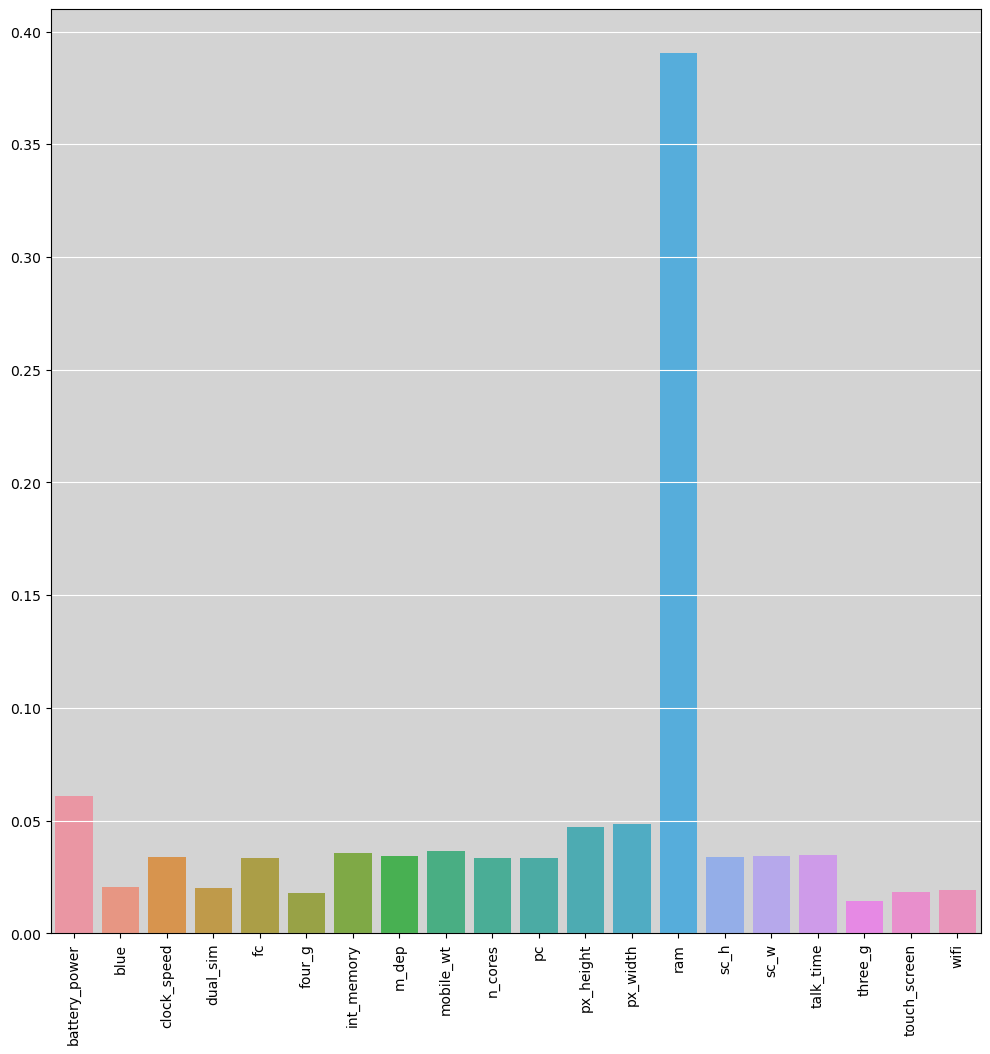

In [13]:
plt.figure(figsize=(12,12))
plt.grid(color ='w' , axis= 'both')
ax =plt.gca()
ax.set_facecolor('lightgray')
sns.barplot(x = X_train.columns , y = gini) 
plt.xticks(rotation=90)
plt.show()

<Axes: >

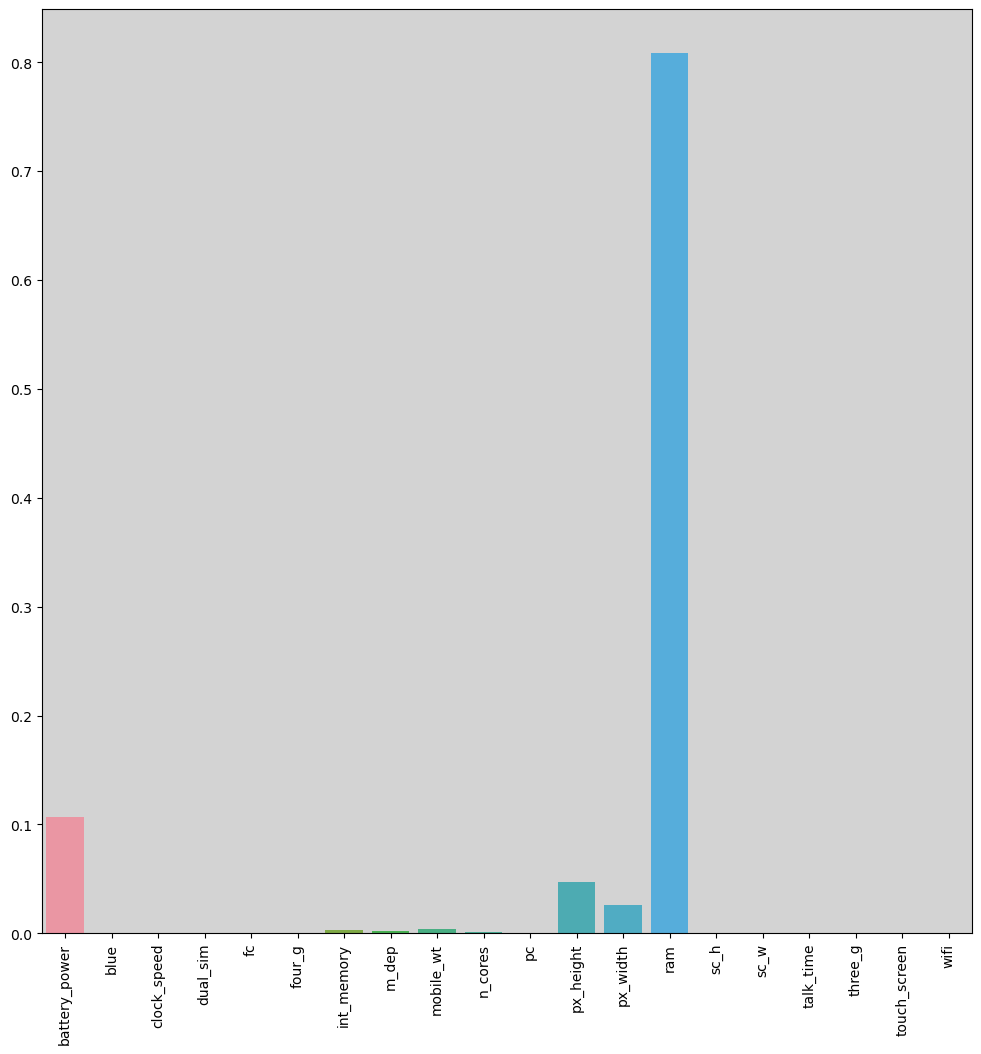

In [20]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier(n_estimators= 50) 
gbc.fit(X,y)
gbc_feature = gbc.feature_importances_ 
plt.figure(figsize=(12,12))
plt.xticks(rotation = 90)
fig = plt.gca()
fig.set_facecolor('lightgray')
sns.barplot(x =X.columns , y=gbc_feature)

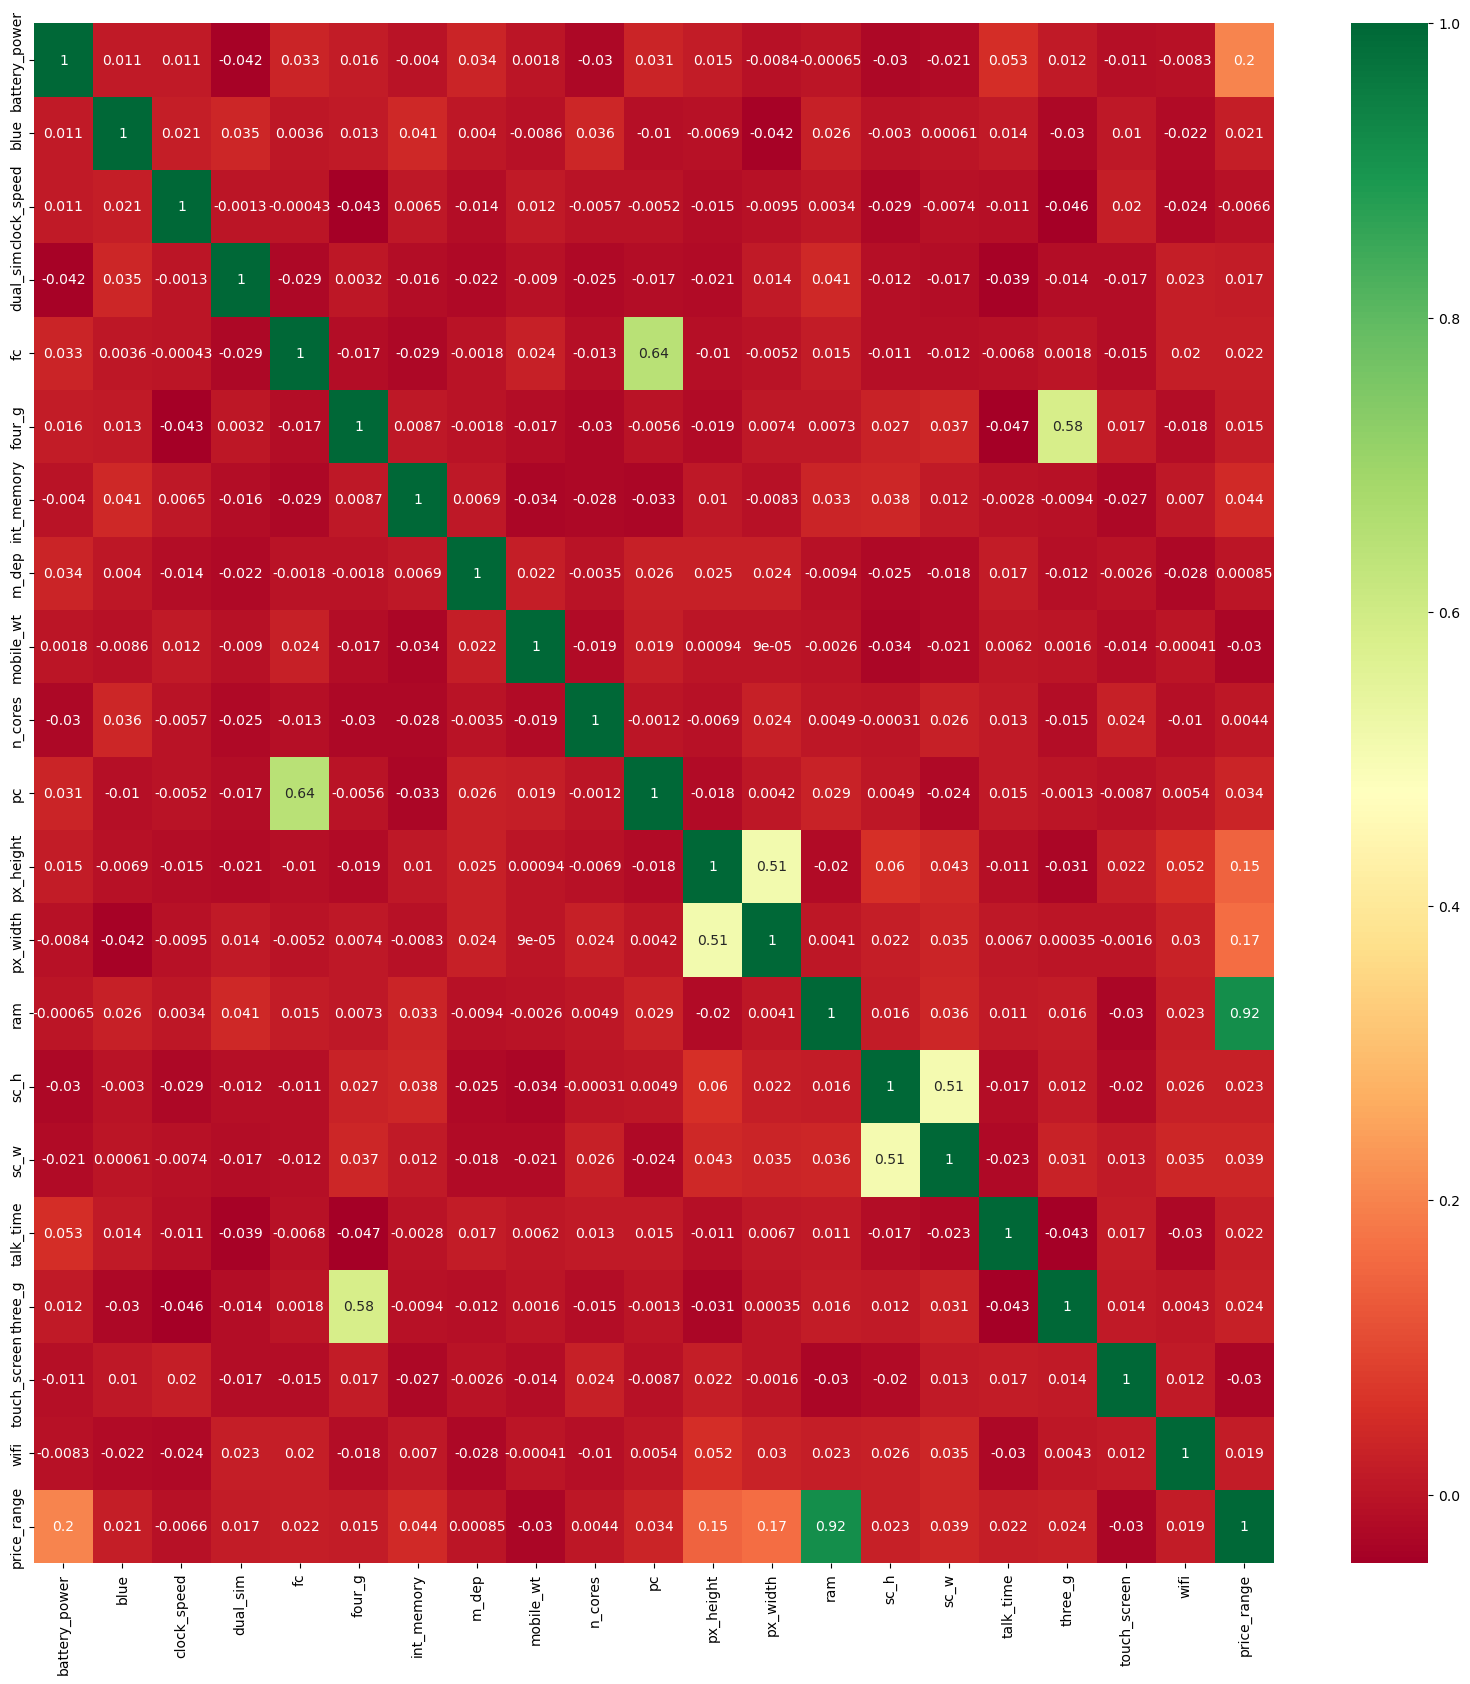

In [41]:
# correlation : 

top_corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(top_corr,annot= True,cmap='RdYlGn')
plt.show()

In [42]:
# from the map ram and price range is 0.92 and px_width and px_height is having high corelation 
# use only those feature which having the corelation grater than 0.2 

In [49]:
new = [] 
for i in top_corr:
    if abs(df[i].corr(df['price_range'])) >= 0.03:
        if i not in new : 
            new.append(i)
new

['battery_power',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'touch_screen',
 'price_range']

In [51]:
new_df_relevent_feature  = df[new]  
new_df_relevent_feature.head()

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,touch_screen,price_range
0,842,7,188,2,20,756,2549,7,0,1
1,1021,53,136,6,905,1988,2631,3,1,2
2,563,41,145,6,1263,1716,2603,2,1,2
3,615,10,131,9,1216,1786,2769,8,0,2
4,1821,44,141,14,1208,1212,1411,2,1,1
